In [1]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(dplyr)
library(patchwork)

Loading required package: edgeR

Loading required package: limma

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedi

In [2]:
obj = qs::qread('../00_preprocessing/_targets/objects/exp_labelled_other')
obj

Loading required package: SeuratObject

Attaching sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


Loading required package: Seurat


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




An object of class Seurat 
56583 features across 37179 samples within 3 assays 
Active assay: SCT (24262 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [3]:
source('../00_preprocessing/preprocessing.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()      masks matrixStats::count()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()     masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()     masks S4Vectors::rename()
✖ dplyr::slice()      masks IRanges::slice()



In [5]:
obj = subset(obj, subset = labels %in% c("Astrocytes", "a1_Tany-Astrocytes"))
obj

An object of class Seurat 
56583 features across 15786 samples within 3 assays 
Active assay: SCT (24262 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [6]:
obj@meta.data = obj@meta.data %>% mutate(batch = stringr::str_replace_all(batch, stringr::fixed(" "), '__'))
obj@meta.data$group = interaction(obj@meta.data$treatment, obj@meta.data$time, obj@meta.data$strain)

In [23]:
obj = sc_transform_fgf1(obj)

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Total Step 1 genes: 19379

Total overdispersed genes: 17784

Excluding 1595 genes from Step 1 because they are not overdispersed.

Variance stabilizing transformation of count matrix of size 21999 by 15786

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Setting estimate of  201 genes to inf as theta_mm/theta_mle < 1e-3

# of step1 poisson genes (variance < mean): 0

# of low mean genes (mean < 0.001): 2719

Total # of Step1 poisson genes (theta=Inf; variance < mean): 228

Total # of poisson genes (theta=Inf; variance < mean): 4156

Calling offset model for all 4156 poisson genes

Found 204 outliers - those will be ignored in fitting/regularization step


Ignoring theta inf genes

Replacing fit params for 4156 poisson genes by theta=Inf

Setting min_variance based on median UMI:  0.04

Second step: Get residuals using fitted parameters for 21999 genes



  |======================================================================| 100%


Computing corrected count matrix for 21999 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.403222 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out batch

Centering data matrix

Set default assay to SCT

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..SCTransform.RNA; see ?make.names for more details on syntax validity"
Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
18:14:52 UMAP embedding parameters a = 0.9922 b = 1.112

18:14:52 Read 15786 rows and found 30 numeric columns

18:14:52 Using Annoy for neighbor search, n_neighbors = 30

18:14:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----

In [24]:
head(obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,Index.10x,nCount_HTO,nFeature_HTO,Index.HTO,nCount_spliced,nFeature_spliced,nCount_unspliced,⋯,strain,treatment,time,collection_date,isolation_date,batch,predicted.id,prediction.score.max,labels,group
,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<dbl>,<fct>,<fct>
GTTGTCCCATCGGCCA_1_1,SI-TT-A11,21393,4603,SI-TT-A11,1728,12,D706,3678,1909,17715,⋯,BL6,Veh_PF,Day5,220329,22/6/2022,Batch__1,Astrocytes,0.8377793,Astrocytes,Veh_PF.Day5.BL6
GATGTTGCACCGTCGA_1_1,SI-TT-A11,17882,4536,SI-TT-A11,2773,12,D706,3586,1849,14296,⋯,BL6,Veh_PF,Day5,220329,22/6/2022,Batch__1,Astrocytes,0.3766444,Astrocytes,Veh_PF.Day5.BL6
GAACTGTCAACCACAT_1_1,SI-TT-A11,17320,3944,SI-TT-A11,1539,12,D706,3020,1610,14300,⋯,obob,FGF1,Day5,220329,22/6/2022,Batch__1,Astrocytes,0.6108648,Astrocytes,FGF1.Day5.obob
TGAGTCACAGACTGCC_1_1,SI-TT-A11,16937,4126,SI-TT-A11,1526,12,D706,3019,1637,13918,⋯,BL6,Veh_PF,Day14,220407,22/6/2022,Batch__1,Astrocytes,0.9025608,Astrocytes,Veh_PF.Day14.BL6
GTACAGTTCATCGACA_1_1,SI-TT-A11,15782,3875,SI-TT-A11,1650,12,D706,2671,1510,13111,⋯,obob,FGF1,Day5,211213,22/6/2022,Batch__1,Astrocytes,0.5762727,Astrocytes,FGF1.Day5.obob
ACACCAATCCGTGGCA_1_1,SI-TT-A11,15717,3837,SI-TT-A11,1737,12,D706,2934,1586,12783,⋯,obob,FGF1,Day14,220131,22/6/2022,Batch__1,Astrocytes,0.7040983,Astrocytes,FGF1.Day14.obob


In [25]:
sce = as.SingleCellExperiment(obj)
sce

class: SingleCellExperiment 
dim: 21999 15786 
metadata(0):
assays(2): counts logcounts
rownames(21999): Lypla1 Tcea1 ... ENSMUSG00000095742 ENSMUSG00000095041
rowData names(0):
colnames(15786): GTTGTCCCATCGGCCA_1_1 GATGTTGCACCGTCGA_1_1 ...
  AAACCCAGTCGTTCAA_5_3 TTAATCCGTGATAGTA_5_3
colData names(36): orig.ident nCount_RNA ... group ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(2): RNA integrated

In [26]:
# reducedDim(sce, "PCA", withDimnames=TRUE) <- obj[['pca']]@cell.embeddings

In [27]:
# sce <- runUMAP(sce, dimred='PCA', name = 'UMAP', n_dimred = 30)

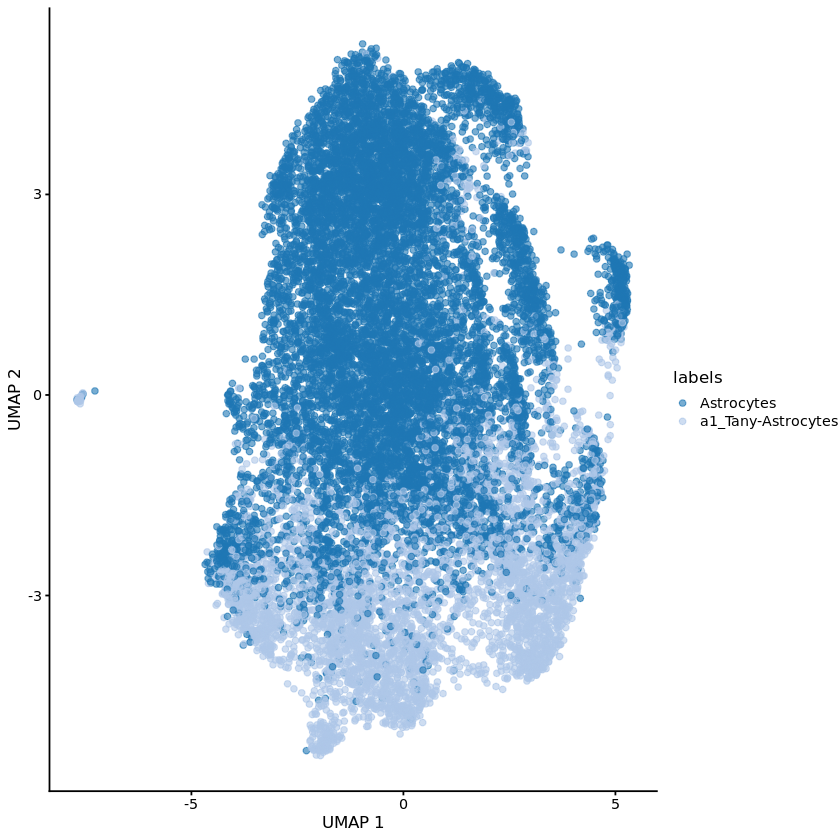

In [28]:
plotReducedDim(sce, colour_by = 'labels', dimred='UMAP')

In [29]:
obob_milo <- Milo(sce)

#build KNN graph
obob_milo <- buildGraph(obob_milo, k=40, d=30, reduced.dim = 'PCA')

#define neighbourhoods
obob_milo <- makeNhoods(obob_milo, prop = 0.1, k= 40, d=30, refined = T, reduced_dims = 'PCA')

Constructing kNN graph with k:40

Checking valid object

Running refined sampling with reduced_dim



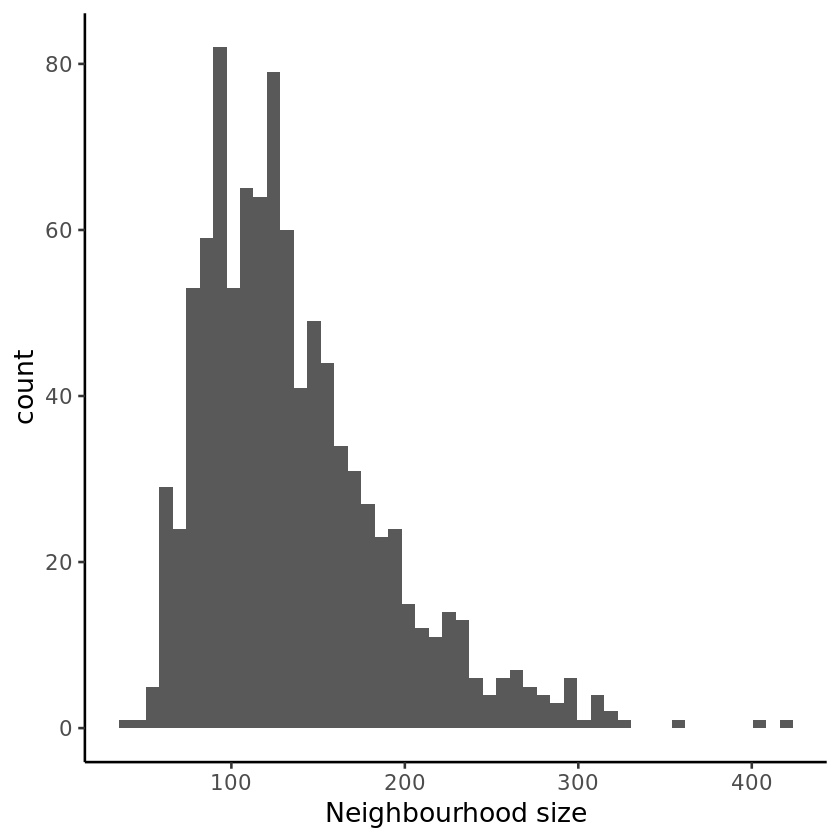

In [30]:
#plot neighbourhood sizes to check if we used appropriate k for graph building
  #we want to have an average size over 5 x N_samples
  #we have 171 samples - but not all samples will be in all neighbourhoods because of age variance
plotNhoodSizeHist(obob_milo)

Checking meta.data validity

Counting cells in neighbourhoods



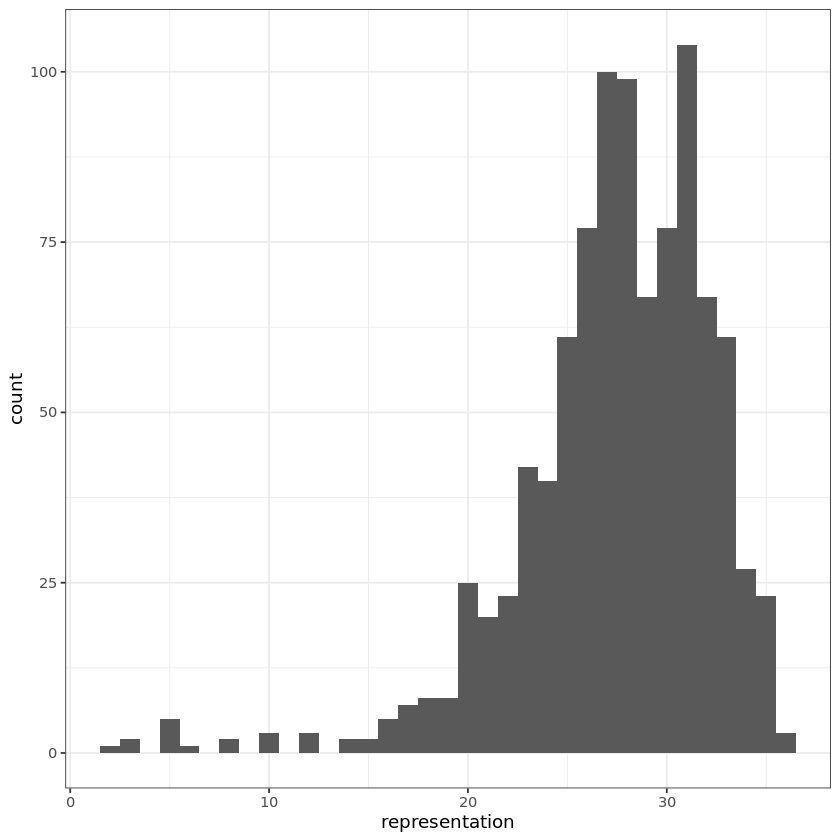

In [31]:
#add a n x m matrix to the milo object with number of neighbourhodds and samples
obob_milo <- countCells(obob_milo, meta.data = as.data.frame(colData(obob_milo)), sample = 'hash.mcl.ID')

#calculate sample representation in each neighbourhood
cell_counts <- as.data.frame(nhoodCounts(obob_milo)) %>% mutate(representation = rowSums(.>0))

#view distribution of N_samples in each neigbourhood
ggplot(cell_counts, aes(x = representation)) + 
  geom_histogram(binwidth = 1) + theme_bw()

#most neighbourhoods have 30-60 samples in them

In [32]:
obob_design <- data.frame(colData(obob_milo))[, c('hash.mcl.ID', 'group', 'batch', "strain")]
#convert seq-pool to factor
obob_design$batch <- as.factor(obob_design$batch)
#keep unique rows
obob_design <- distinct(obob_design)
#change rownames
rownames(obob_design) <- obob_design$hash.mcl.ID
head(obob_design)

,hash.mcl.ID,group,batch,strain
,<chr>,<fct>,<fct>,<fct>
M2,M2,Veh_PF.Day5.BL6,Batch__1,BL6
M9,M9,FGF1.Day5.obob,Batch__1,obob
M18,M18,Veh_PF.Day14.BL6,Batch__1,BL6
N7,N7,FGF1.Day5.obob,Batch__1,obob
J11,J11,FGF1.Day14.obob,Batch__1,obob
M8,M8,Veh_PF.Day5.obob,Batch__1,obob


In [33]:
print(obob_design)

    hash.mcl.ID             group    batch strain
M2           M2   Veh_PF.Day5.BL6 Batch__1    BL6
M9           M9    FGF1.Day5.obob Batch__1   obob
M18         M18  Veh_PF.Day14.BL6 Batch__1    BL6
N7           N7    FGF1.Day5.obob Batch__1   obob
J11         J11   FGF1.Day14.obob Batch__1   obob
M8           M8  Veh_PF.Day5.obob Batch__1   obob
J2           J2 Veh_PF.Day14.obob Batch__1   obob
M24         M24 Veh_PF.Day14.obob Batch__1   obob
M13         M13   FGF1.Day14.obob Batch__1   obob
N8           N8  Veh_PF.Day5.obob Batch__1   obob
M17         M17  Veh_PF.Day14.BL6 Batch__1    BL6
M4           M4   Veh_PF.Day5.BL6 Batch__1    BL6
M10         M10    FGF1.Day5.obob Batch__2   obob
M11         M11  Veh_PF.Day5.obob Batch__2   obob
J16         J16   FGF1.Day14.obob Batch__2   obob
M23         M23   FGF1.Day14.obob Batch__2   obob
J7           J7 Veh_PF.Day14.obob Batch__2   obob
M5           M5   Veh_PF.Day5.BL6 Batch__2    BL6
N12         N12  Veh_PF.Day5.obob Batch__2   obob


In [34]:
length(unique(obob_design$group))

[1] 6

In [35]:
dput(unique(obob_design$group))

structure(c(4L, 7L, 2L, 5L, 8L, 6L), .Label = c("FGF1.Day14.BL6", 
"Veh_PF.Day14.BL6", "FGF1.Day5.BL6", "Veh_PF.Day5.BL6", "FGF1.Day14.obob", 
"Veh_PF.Day14.obob", "FGF1.Day5.obob", "Veh_PF.Day5.obob"), class = "factor")


In [36]:
# store distances to nearest neighbours
obob_milo <- calcNhoodDistance(obob_milo, d=30, reduced.dim = 'PCA')
qs::qsave(obob_milo, 'obob_milo_astros_all.qs')
# obob_milo = qs::qread('obob_milo_other_all.qs')

In [38]:
# contrast.all = c("groupFGF1.Day5-groupVeh_PF.Day5")
model <- model.matrix(~0 + group, data=obob_design)
# mod.contrast <- makeContrasts(contrasts=contrast.all, levels=model)
# head(model)

In [39]:
options(width=120) 
print(model)

    groupFGF1.Day14.BL6 groupVeh_PF.Day14.BL6 groupFGF1.Day5.BL6 groupVeh_PF.Day5.BL6 groupFGF1.Day14.obob
M2                    0                     0                  0                    1                    0
M9                    0                     0                  0                    0                    0
M18                   0                     1                  0                    0                    0
N7                    0                     0                  0                    0                    0
J11                   0                     0                  0                    0                    1
M8                    0                     0                  0                    0                    0
J2                    0                     0                  0                    0                    0
M24                   0                     0                  0                    0                    0
M13                   0              

In [41]:
# da_results <- testNhoods(obob_milo, design = model, design.df = obob_design) #works!
da_results <- testNhoods(obob_milo, design = model, design.df = obob_design, model.contrasts = c("groupFGF1.Day5-groupVeh_PF.Day5"))

da_results %>%
  arrange(SpatialFDR) %>%
  head()

table(da_results$FDR < 0.1)

Using TMM normalisation



ERROR: Error in glmFit.default(sely, design, offset = seloffset, dispersion = 0.05, : Design matrix not of full rank.  The following coefficients not estimable:
 groupFGF1.Day14.BL6 groupFGF1.Day5.BL6


In [ ]:
ggplot(da_results, aes(PValue)) + geom_histogram(bins=100)

In [ ]:
ggplot(da_results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = 1) ## Mark significance threshold (10% FDR)

In [ ]:
obob_milo <- buildNhoodGraph(obob_milo)

In [ ]:
head(data.frame(colData(obob_milo)))

In [ ]:
umap_pl <- plotReducedDim(obob_milo, dimred = "UMAP", colour_by="labels", text_by = "labels", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none")

In [ ]:
umap_pl

In [ ]:
nh_graph_pl <- plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2)) 

In [ ]:
options(repr.plot.width=25, repr.plot.height=10)
umap_pl + nh_graph_pl +
  plot_layout(guides="collect")

In [ ]:
da_results <- annotateNhoods(obob_milo, da_results, coldata_col = "labels")
head(da_results)

In [ ]:
#we want to set a threshold to exclude neighbourhoods with a mix of cell types
ggplot(da_results, aes(labels_fraction)) + geom_histogram(bins=50)

In [ ]:
da_results$labels <- ifelse(da_results$labels_fraction < 0.7, "Mixed", da_results$labels)

In [ ]:
options(repr.plot.width=10, repr.plot.height=20)
plotDAbeeswarm(da_results, group.by = "labels")

In [ ]:
filt_results <- filter(da_results, !labels %in% c("Unassigned1", "Unassigned2", "Mixed") )

In [ ]:
sign_Nhoods <- filt_results %>% filter(FDR<0.1) %>% 
  mutate(enrich = if_else(logFC >1, 'greater', 'less')) %>% 
  group_by(labels, enrich) %>%
  summarise(sign_Nhoods=n())

In [ ]:
sign_Nhoods

In [ ]:
total_Nhoods <- filt_results %>% group_by(labels) %>%
  summarise(noNhoods=n()) %>%
  full_join(sign_Nhoods, by='labels')

# total_Nhoods[is.na(total_Nhoods)] <- 0
total_Nhoods

In [ ]:
total_Nhoods <- 
  total_Nhoods %>%
  mutate(proportionNhood = sign_Nhoods/noNhoods) %>%
  rename(labels = 'celltype')

In [ ]:
2